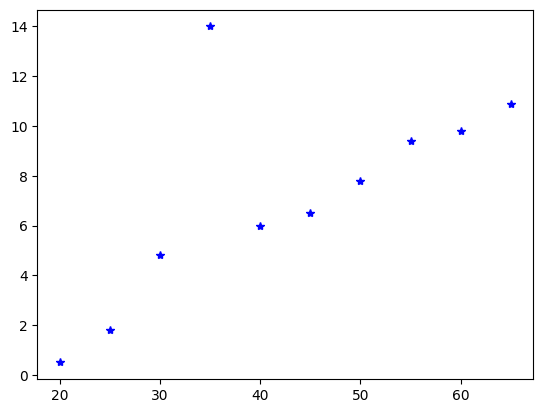

In [41]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([20,25,30,35,40,45,50,55,60,65])
y = np.array([0.5,1.8,4.8,14,6,6.5,7.8,9.4,9.8,10.9])
plt.plot(x,y,'*b')

In [6]:
def SLR(x,y):
  xmean = np.mean(x)
  ymean = np.mean(y)
  num = 0
  den = 0
  for i in range(len(x)):
    num += (y[i]-ymean)*(x[i]-xmean)
    den += (x[i]-xmean)**2
  eps = 0.00000001
  a = num/(den+eps)
  b = ymean - a*xmean
  return a,b

In [28]:
slope,bias = SLR(x,y)

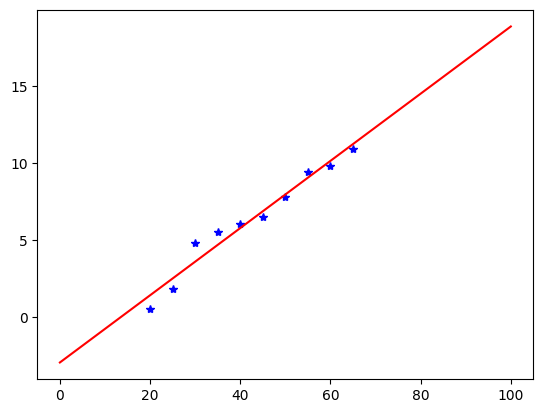

In [29]:
xnew = np.linspace(0,100,100)
ypred = slope * xnew + bias
plt.plot(x,y,'*b')
plt.plot(xnew,ypred,'-r')

In [21]:
def R2(a,b,x,y):
  ypred = a * x + b
  ymean = np.mean(y)
  RSS = 0
  TSS = 0
  eps = 0.00000001
  for i in range(len(y)):
    RSS += (y[i]-ypred[i])**2
    TSS += (y[i]-ymean)**2
  return 1-(RSS/(TSS+eps))

In [30]:
print(R2(slope,bias,x,y))

0.9608711898826529


In [31]:
def MLR(X,Y):
  Xt = X.T
  XtX = np.matmul(Xt,X)
  XtXinv = np.linalg.inv(XtX)
  XtXinv_Xt = np.matmul(XtXinv,Xt)
  BETAs = np.matmul(XtXinv_Xt,Y)
  return BETAs

In [34]:
X = np.array([x,x**2,x**3,x**4,x**5,x**6,x**7,np.ones(len(x))])
print(X.T)

[[2.00000e+01 4.00000e+02 8.00000e+03 1.00000e+00]
 [2.50000e+01 6.25000e+02 1.56250e+04 1.00000e+00]
 [3.00000e+01 9.00000e+02 2.70000e+04 1.00000e+00]
 [3.50000e+01 1.22500e+03 4.28750e+04 1.00000e+00]
 [4.00000e+01 1.60000e+03 6.40000e+04 1.00000e+00]
 [4.50000e+01 2.02500e+03 9.11250e+04 1.00000e+00]
 [5.00000e+01 2.50000e+03 1.25000e+05 1.00000e+00]
 [5.50000e+01 3.02500e+03 1.66375e+05 1.00000e+00]
 [6.00000e+01 3.60000e+03 2.16000e+05 1.00000e+00]
 [6.50000e+01 4.22500e+03 2.74625e+05 1.00000e+00]]


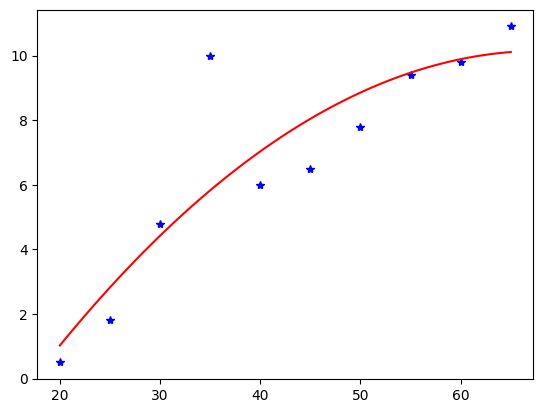

In [59]:
X = np.array([x,x**2,x**3,x**4,x**5,x**6,x**7,np.ones(len(x))])
y = np.array([0.5,1.8,4.8,10,6,6.5,7.8,9.4,9.8,10.9])
BETAs = MLR(X.T,y)
xnew = np.linspace(20,65,100)
Xnew = np.array([xnew,xnew**2,xnew**3,xnew**4,xnew**5,xnew**6,xnew**7,np.ones(len(xnew))])
ypred = np.matmul(BETAs,Xnew)
plt.plot(x,y,'*b')
plt.plot(xnew,ypred,'-r')